# Zip Code to latitude & longitude

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="zipcode")

In [2]:
zipcode = geolocator.geocode({"postalcode": 1180, "country":"belgium"})


In [3]:
zipcode

Location(Uccle - Ukkel, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1180, België / Belgique / Belgien, (50.797076685753424, 4.343966393150685, 0.0))

In [4]:
print (f'y:{zipcode.latitude} x:{zipcode.longitude}')

y:50.797076685753424 x:4.343966393150685


In [5]:
latitude = geolocator.geocode({"postalcode": 1180, "country":"belgium"}).latitude

In [6]:
longitude = geolocator.geocode({"postalcode": 1180, "country":"belgium"}).longitude

# Data analys

In [7]:
import pandas as pd
import numpy as np

In [8]:
df_raw = pd.read_csv('Property_structured_data.csv')

In [9]:
df_raw.describe

<bound method NDFrame.describe of              id                         locality  postal_code    region  \
0      10131114                            HEURE         5377  Wallonie   
1      10150865                           Dinant         5500  Wallonie   
2      10134850  Jemeppe-sur-Sambre Saint-Martin         5190  Wallonie   
3      10022778                         Gembloux         5030  Wallonie   
4       9989192                      Sambreville         5060  Wallonie   
...         ...                              ...          ...       ...   
62425  10145286         Gent Sint-Denijs-Westrem         9051  Flanders   
62426  10121910                   Geraardsbergen         9500  Flanders   
62427  10103172                      Denderleeuw         9470  Flanders   
62428   9617011                            Aalst         9300  Flanders   
62429  10024976                          Stekene         9190  Flanders   

            province type_of_property subtype_of_property      ty

# xxx

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import zscore

In [11]:
df_raw = pd.read_csv('Property_structured_data.csv')

In [12]:
df_raw.shape

(62430, 23)

In [13]:
df_raw.dtypes

id                         int64
locality                  object
postal_code                int64
region                    object
province                  object
type_of_property          object
subtype_of_property       object
type_of_sale              object
price                      int64
number_of_bedrooms         int64
surface                    int64
kitchen_type              object
fully_equipped_kitchen    object
furnished                  int64
open_fire                  int64
terrace                    int64
terrace_surface            int64
garden                     int64
garden_surface             int64
land_surface               int64
number_of_facades          int64
swimming_pool              int64
state_of_the_building     object
dtype: object

In [30]:
for column in df_raw.columns.to_list():
    print(df_raw[column])
    print(column)

0        10131114
1        10150865
2        10134850
3        10022778
4         9989192
           ...   
62425    10145286
62426    10121910
62427    10103172
62428     9617011
62429    10024976
Name: id, Length: 62430, dtype: int64
id
0                                  HEURE
1                                 Dinant
2        Jemeppe-sur-Sambre Saint-Martin
3                               Gembloux
4                            Sambreville
                      ...               
62425           Gent Sint-Denijs-Westrem
62426                     Geraardsbergen
62427                        Denderleeuw
62428                              Aalst
62429                            Stekene
Name: locality, Length: 62430, dtype: object
locality
0        5377
1        5500
2        5190
3        5030
4        5060
         ... 
62425    9051
62426    9500
62427    9470
62428    9300
62429    9190
Name: postal_code, Length: 62430, dtype: int64
postal_code
0        Wallonie
1        Wallonie
2      

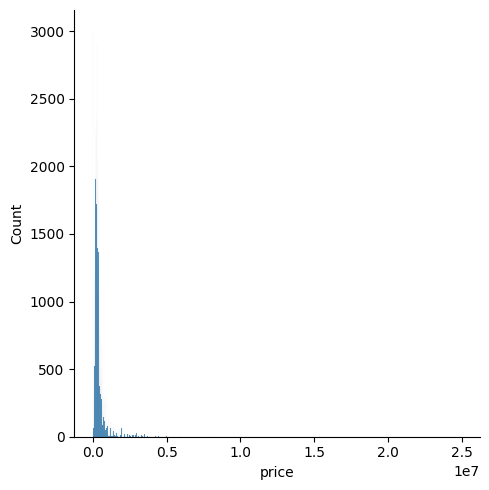

In [14]:
sns.displot(df_raw['price'])

In [15]:
#Missing values
df_raw[df_raw.isnull()].count()

id                        0
locality                  0
postal_code               0
region                    0
province                  0
type_of_property          0
subtype_of_property       0
type_of_sale              0
price                     0
number_of_bedrooms        0
surface                   0
kitchen_type              0
fully_equipped_kitchen    0
furnished                 0
open_fire                 0
terrace                   0
terrace_surface           0
garden                    0
garden_surface            0
land_surface              0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
dtype: int64

<AxesSubplot: >

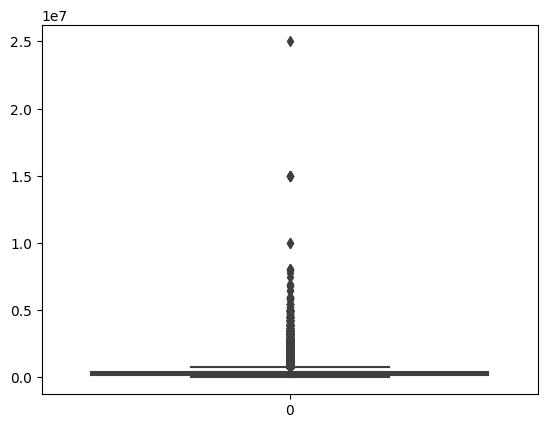

In [16]:
#check Outliers
sns.boxplot(df_raw['price'])

In [17]:
sns.boxplot(z)

NameError: name 'z' is not defined

In [18]:
#remove outliers Z = x-mean/SD
z = np.abs(stats.zscore(df_raw['price']))

NameError: name 'stats' is not defined

<AxesSubplot: xlabel='price', ylabel='number_of_bedrooms'>

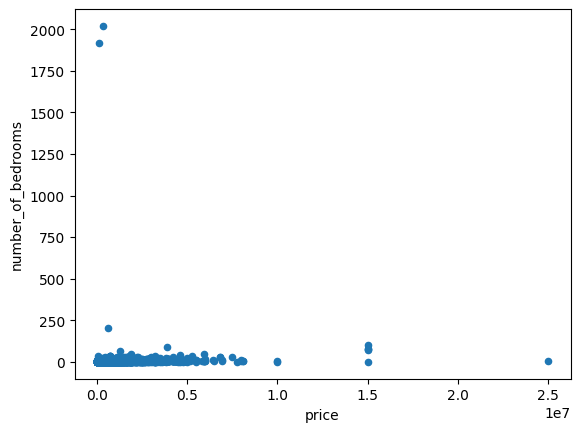

In [19]:
df_raw.plot(kind='scatter',x='price',y='number_of_bedrooms')

In [20]:
x = df_raw[(np.abs(stats.zscore(df_raw['price'])) < 1)].shape

NameError: name 'stats' is not defined

In [ ]:
x.plot(kind='scatter',x='price',y='number_of_bedrooms')

In [23]:
zscore_price = zscore(df_raw['price'])

In [24]:
zscore_price = zscore_price < 1

ValueError: plot kind scatter can only be used for data frames